In [1]:
# Import necessary libraries
import os
import xarray
import numpy as np
from PIL import Image
from tiffslide import TiffSlide

In [5]:
# Set up important directories
WS_DIR = '/storage1/fs1/swamidass/Active/group_root/data/pathology/handoff/trusted_kidney_large_study_2022/raw_data/whole_slide_images/'
PREDS_DIR = '/storage1/fs1/swamidass/Active/group_root/data/pathology/handoff/trusted_kidney_large_study_2022/raw_data/convnet_processed_data/'
slide_of_interest = 'ACD1108'

## Open Whole Slide Image

In [6]:
# Read in whole slide image
F = TiffSlide(os.path.join(WS_DIR, slide_of_interest, 'ACD1108.kid-001.svs'))

In [7]:
# Number of levels of resolution
F.level_count

3

In [8]:
# Dimensions have different resolution 
F.level_dimensions

((12600, 23333), (3150, 5833), (1575, 2916))

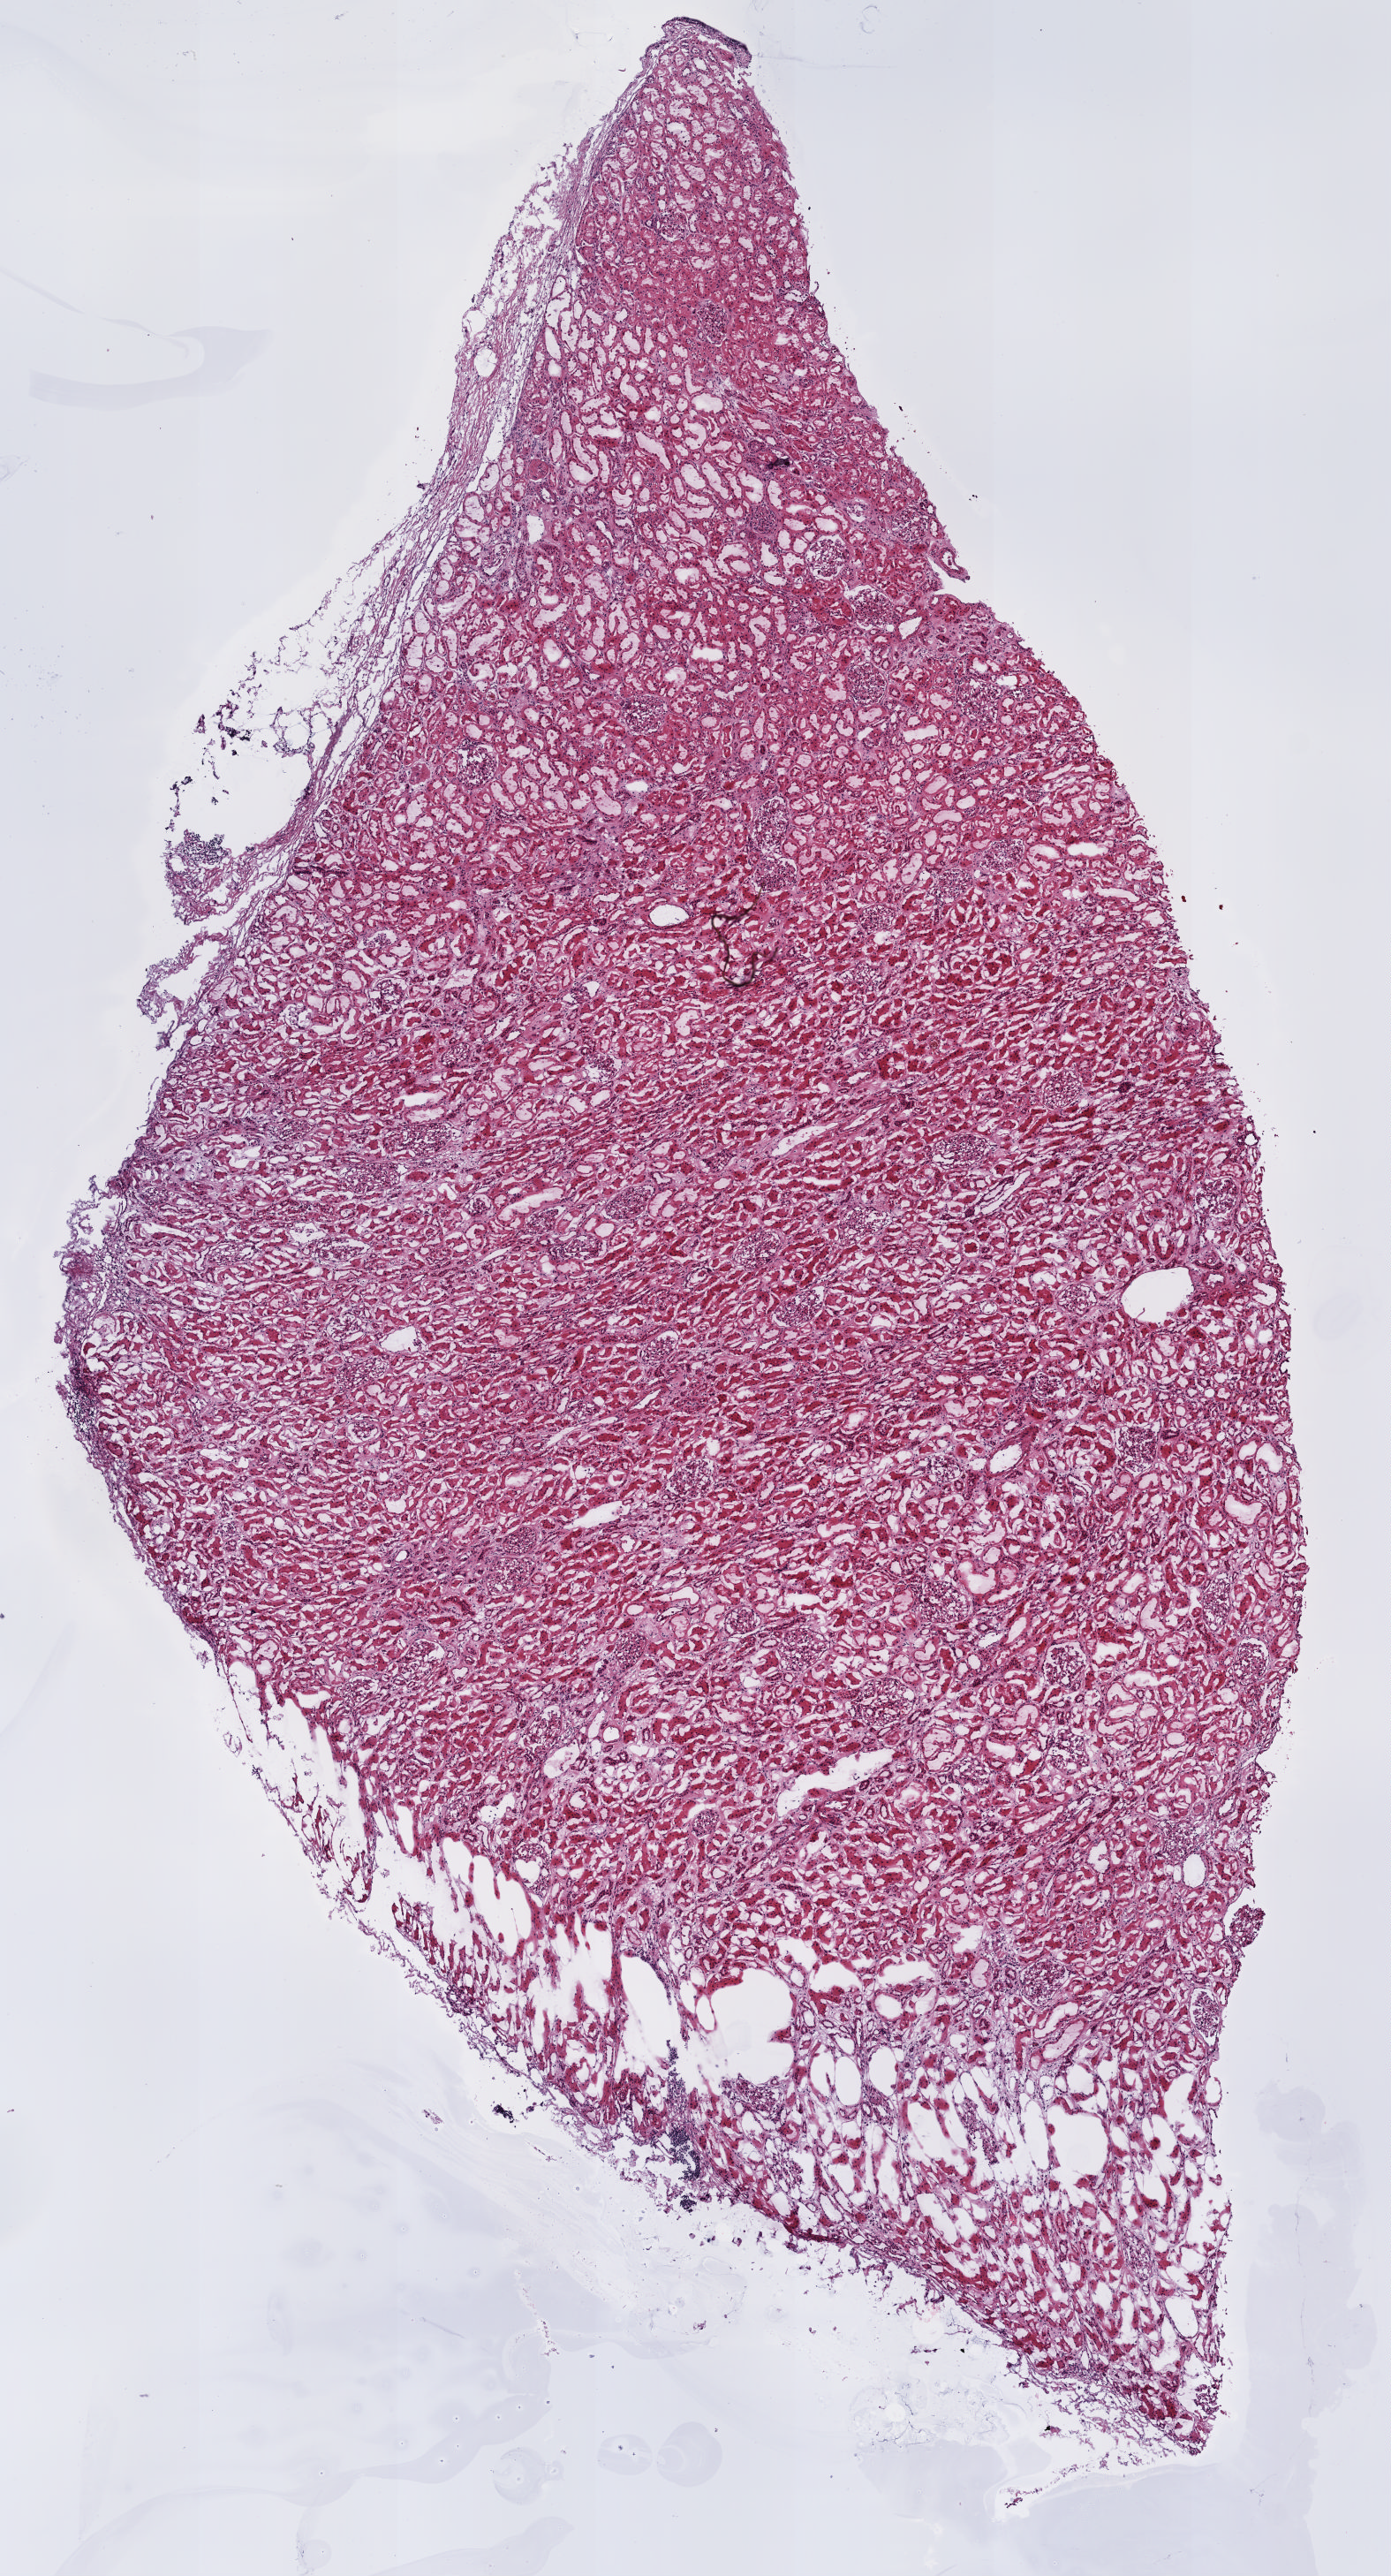

In [9]:
# Read Region([Area of Interest], [Level of Interest], [Dimension of Interest])
F.read_region((0,0), 2, F.level_dimensions[2])

In [18]:
label_png = F.associated_images['label']

## Display Predictions of Whole Slide Image

In [7]:
# Read in predictions
out = xarray.open_dataset(os.path.join(PREDS_DIR, slide_of_interest, 'ACD1108.kid-001.svs-output.h5'))
out

<xarray.Dataset>
Dimensions:  (phony_dim_0: 722, phony_dim_1: 389, phony_dim_2: 4)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables:
    data     (phony_dim_0, phony_dim_1, phony_dim_2) float32 ...

In [8]:
# Rename dimensions
out = out.rename_dims({'phony_dim_0':'x', 'phony_dim_1':'y', 'phony_dim_2':'c'})
out

<xarray.Dataset>
Dimensions:  (x: 722, y: 389, c: 4)
Dimensions without coordinates: x, y, c
Data variables:
    data     (x, y, c) float32 ...

In [9]:
# Add attributes
out['data'].attrs['version'] = 'v1.1'
out['data'].attrs['source'] = str(os.path.join(PREDS_DIR, slide_of_interest))
out['data']

<xarray.DataArray 'data' (x: 722, y: 389, c: 4)>
[1123432 values with dtype=float32]
Dimensions without coordinates: x, y, c
Attributes:
    version:  v1.1
    source:   /storage1/fs1/swamidass/Active/group_root/data/pathology/truste...

In [10]:
# Transpose data to color
x = out['data'].to_numpy()
x = np.array((x * 255), np.uint8)

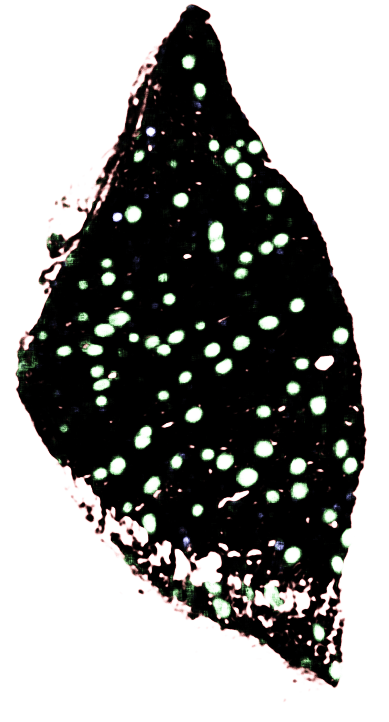

In [11]:
# Display predictions
Image.fromarray(x)

In [12]:
# Rotate image with transpose
x = out['data'].transpose('y', 'x', 'c').to_numpy()
x = np.array((x * 255), np.uint8)

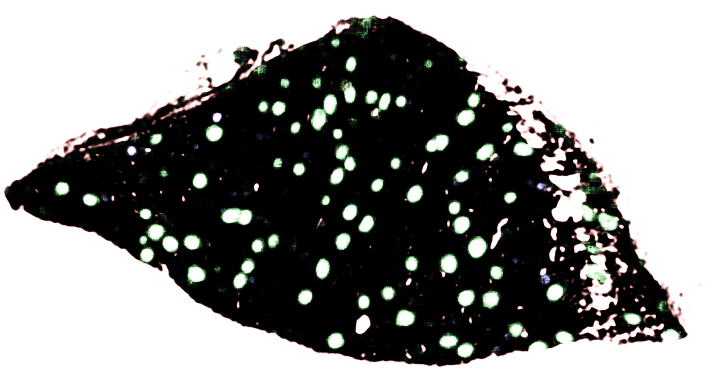

In [13]:
# Display predictions
Image.fromarray(x)